In [1]:
import pandas as pd
import numpy as np
import sys
import os
from pathlib import Path

# Detect project root (parent of notebooks/)
ROOT = Path.cwd().parents[0]

# Add root to path if not present
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))

# Define paths used in the pipeline
DATA_TRAIN   = ROOT / "data" / "interim" / "training_fe.csv"
DATA_LABELS  = ROOT / "data" / "raw" / "training_set_labels.csv"
DATA_TEST    = ROOT / "data" / "interim" / "test_fe.csv"

ARTIFACTS    = ROOT / "artifacts"

In [3]:
from src.modeling import load_final_models
models = load_final_models(str(ARTIFACTS))

In [5]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

def plot_shap_importance(models, X_data):
    """
    Calculates and plots SHAP values for the given models.
    
    Args:
        models: Dictionary of trained models
    """
    # Initialize JS visualization code (if running in a notebook environment)
    shap.initjs()
    
    for target, model in models.items():
        print(f"\n=== SHAP Analysis for {target} ===")
        
        # Create TreeExplainer
        explainer = shap.TreeExplainer(model)
        
        # Calculate SHAP values
        shap_values = explainer.shap_values(X_data)
        
        # For binary classification, shap_values is often a list: [class_0_values, class_1_values]
        # We are interested in class 1 (the positive case: received vaccine)
        if isinstance(shap_values, list):
            vals = shap_values[1]
        else:
            vals = shap_values
            
        # 1. Summary Plot (Beeswarm)
        # Shows feature importance ranking AND how feature values impact the output
        plt.figure()
        plt.title(f"SHAP Summary: {target}")
        shap.summary_plot(vals, X_data, show=False)
        plt.tight_layout()
        plt.show()
        
        # 2. Bar Plot (Mean absolute SHAP value)
        # Simpler view, strictly for ranking importance magnitude
        plt.figure()
        plt.title(f"SHAP Feature Importance (Mean Abs): {target}")
        shap.summary_plot(vals, X_data, plot_type="bar", show=False)
        plt.tight_layout()
        plt.show()

# Usage Example:
# ---------------------------------------------------------
# from src.modeling_lgbm import load_final_models, load_training_data
#
# # 1. Load Models
# models = load_final_models()
#
# # 2. Load Data (Need features to calculate SHAP values)
# X, _ = load_training_data("data/training_set_features.csv", "data/training_set_labels.csv")
#
# # 3. Run
# plot_shap_importance(models, X_sample)

c:\Projects\Flushot\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
from src.modeling import load_training_data

# Load Data (Need features to calculate SHAP values)
X, _ = load_training_data(DATA_TRAIN, DATA_LABELS)


=== SHAP Analysis for h1n1_vaccine ===


c:\Projects\Flushot\.venv\lib\site-packages\shap\explainers\_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


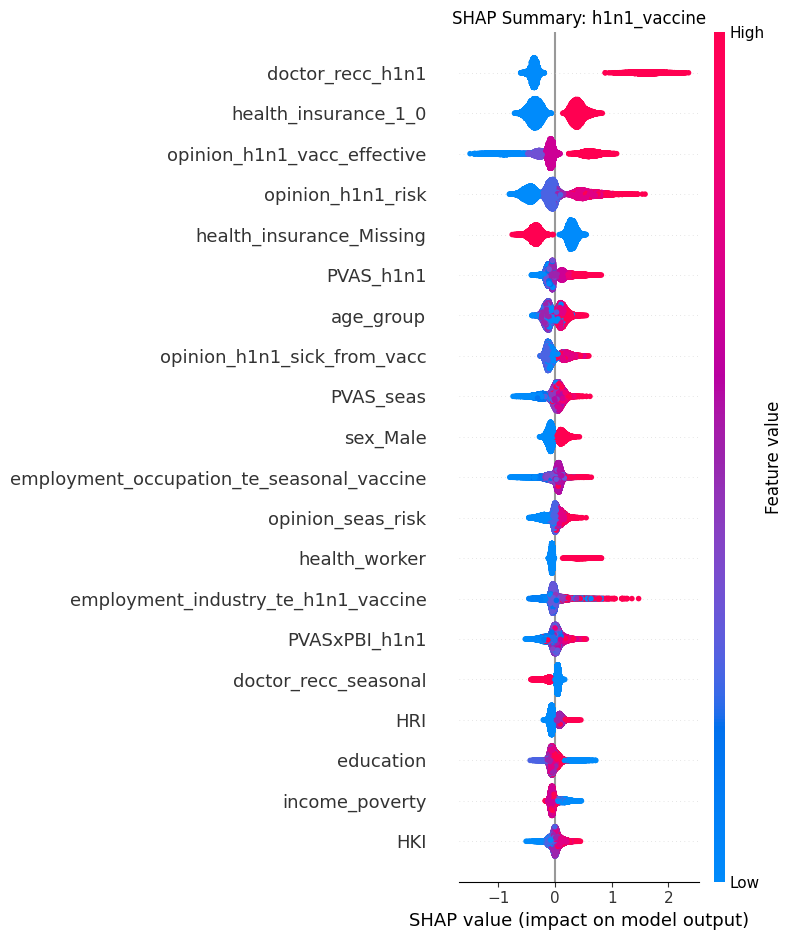

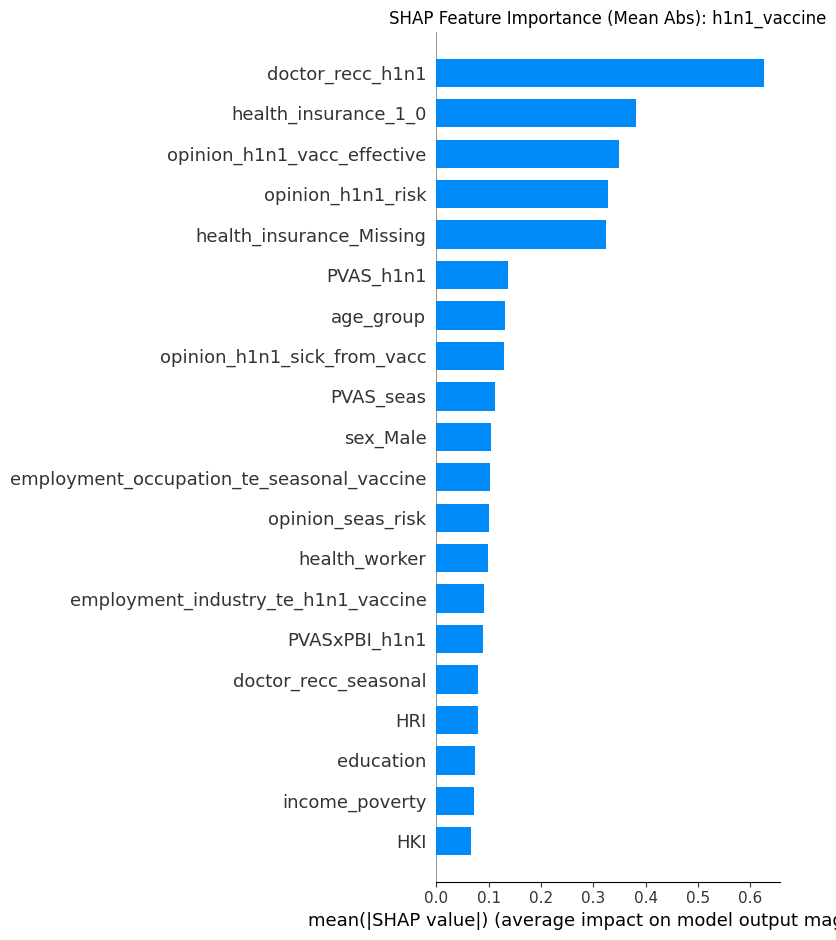


=== SHAP Analysis for seasonal_vaccine ===


c:\Projects\Flushot\.venv\lib\site-packages\shap\explainers\_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


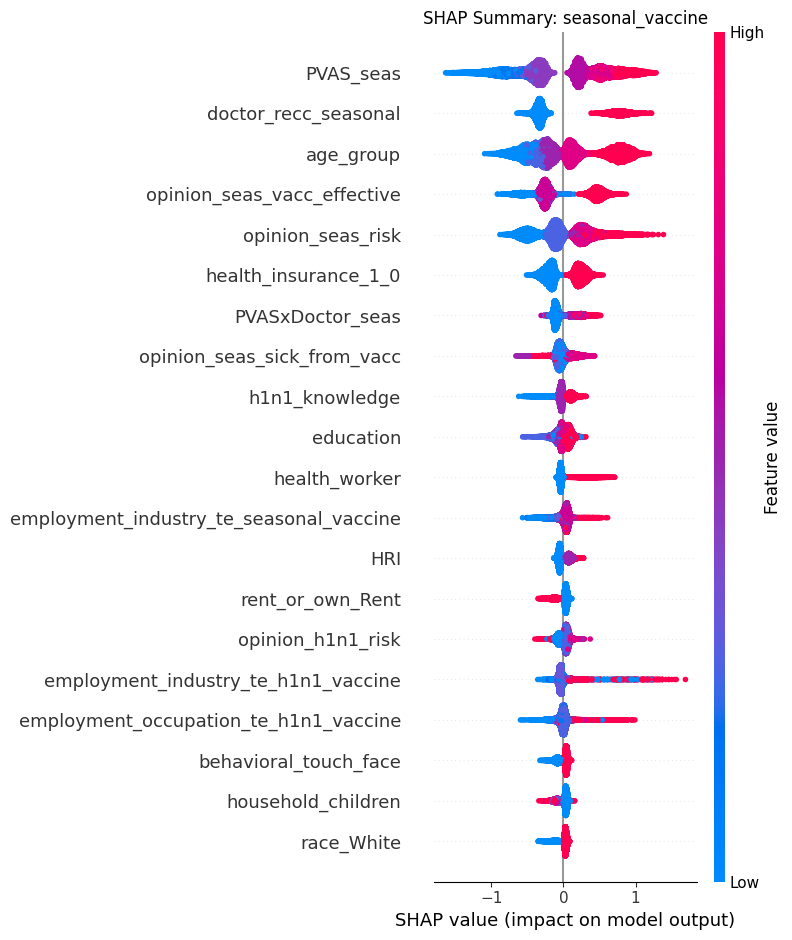

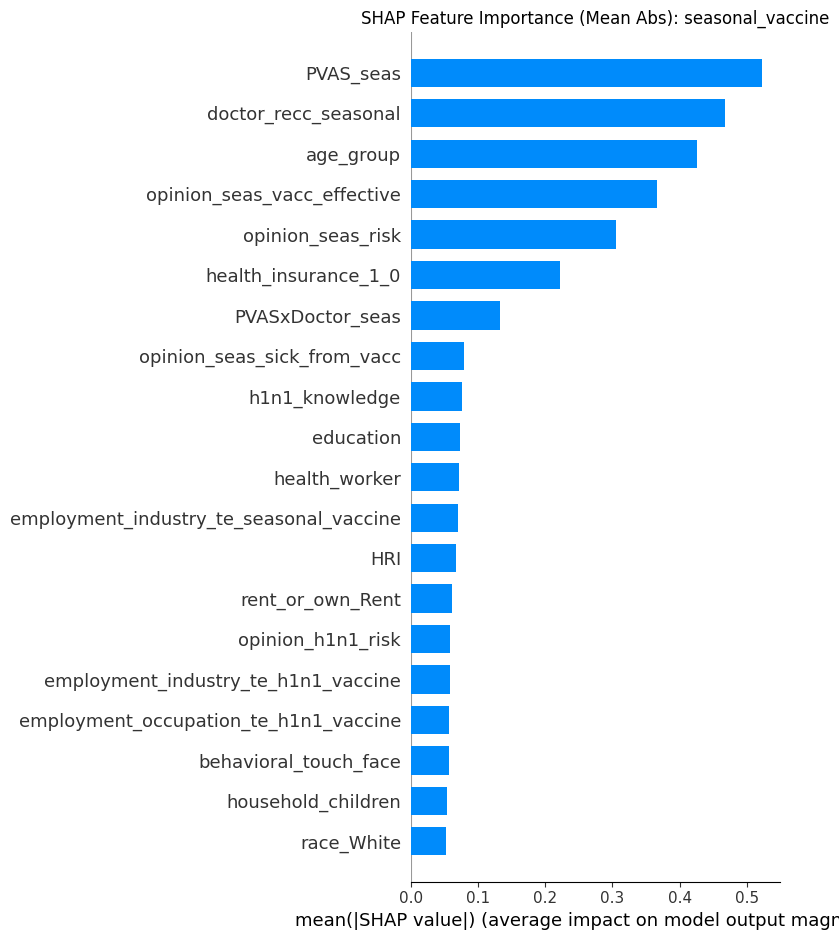

In [7]:
# Run
plot_shap_importance(models, X)